<a href="https://colab.research.google.com/github/JinLeeGG/Python_CodingTest/blob/main/(Day13)%20DFS%2C%20BFS%2C%20Dijkstra's%20Algorithms%20Problems/CodingExample/DFS_BFS_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
https://school.programmers.co.kr/learn/courses/30/lessons/43162

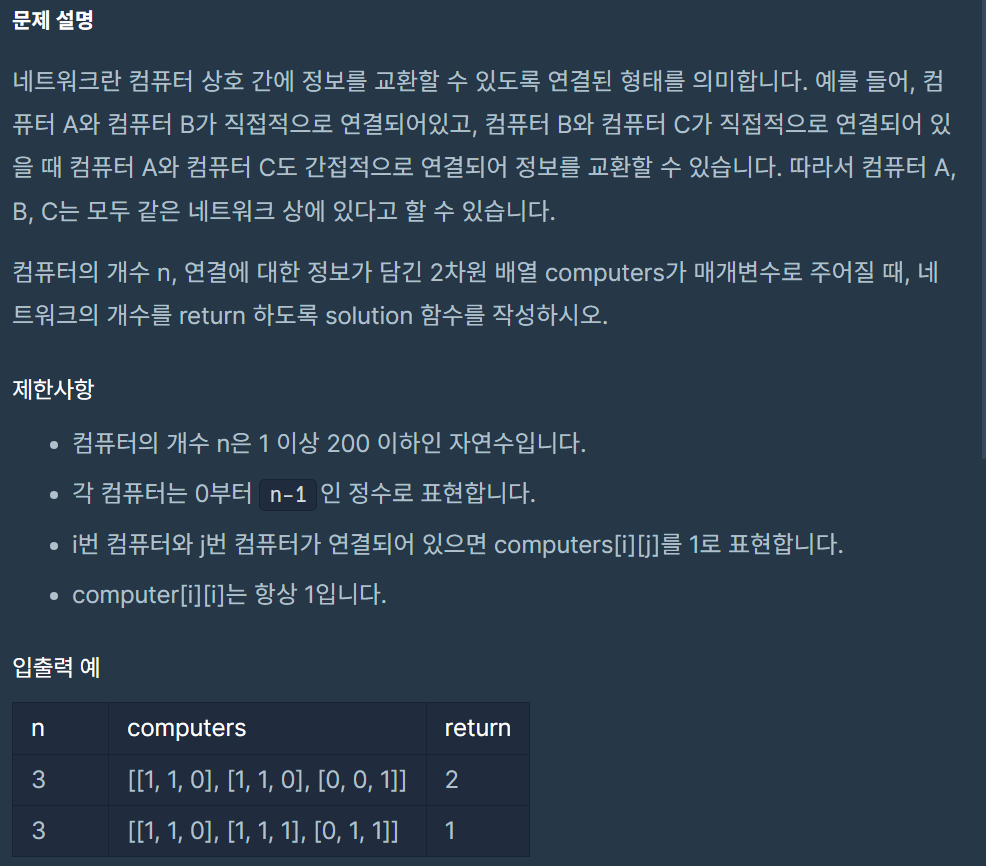

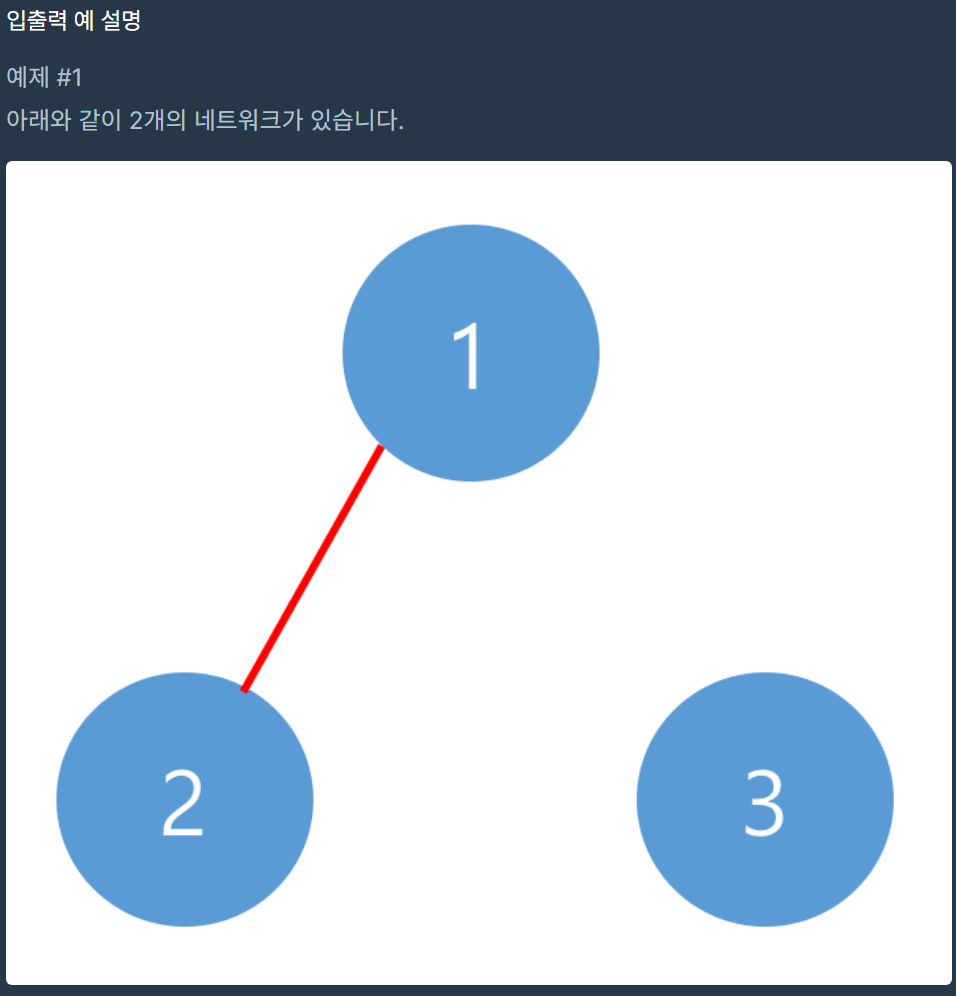

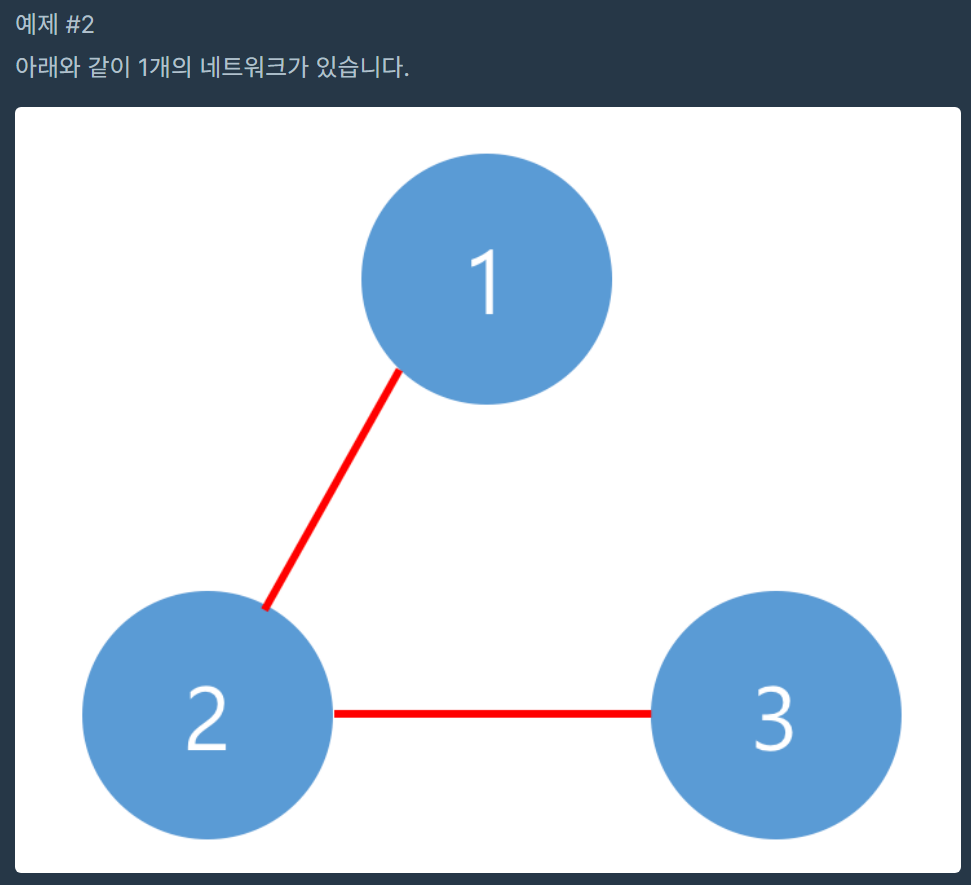

In [22]:
'''
n = 컴퓨터의 개수
computer = 연결되어 있는 네트워크 정보
'''

'''
def dfs(computer, visited, node):
      visited[node] = True

      # 여기에 들어갈 코드를 작성

      if connect and not visited[id]: # 연결되어 있으면서 방문하지 않은 노드라면
          dfs(computer, visited, id)
'''


def dfs(computers, visited, node):
    visited[node] = True  # 현재 노드를 방문 처리

    # 현재 노드와 연결된 모든 노드를 탐색
    for id in range(len(computers)):
        # 연결되어 있고(computers[node][id] == 1) 아직 방문하지 않은 노드라면
        if computers[node][id] == 1 and not visited[id]:
            dfs(computers, visited, id)  # 재귀적으로 DFS 수행


def solution(n, computers):
    answer = 0 # 네트워크 총 개수
    visited = [False for _ in range(n)] # 방문여부 확인용 리스트

    for i in range(n):
        if not visited[i]:
            dfs(computers, visited, i)
            answer += 1 # 깊이 우선 탐색 네트워크 개수

    return answer

print(solution(3, [[1, 1, 0], [1, 1, 0], [0, 0, 1]]))


2


In [17]:
#DFS
def solution(n, computers):
    # 네트워크의 개수를 저장할 변수
    answer = 0

    # 인접 리스트를 생성: 각 컴퓨터가 연결된 다른 컴퓨터를 저장
    # arr[i]는 i번 컴퓨터와 연결된 컴퓨터들의 리스트
    arr = [[] for i in range(n)]  # n개의 빈 리스트 생성

    # computers 배열을 순회하며 연결 정보로 인접 리스트 채우기
    for i in range(n):
        for j in range(i+1, n):  # 대각선을 기준으로 상단 삼각행렬만 확인 (중복 방지)
            if computers[i][j] == 1:  # i번과 j번 컴퓨터가 연결되어 있으면
                arr[i].append(j)  # i -> j 연결 추가
                arr[j].append(i)  # j -> i 연결 추가 (양방향 연결)

    # 방문한 컴퓨터를 추적하기 위한 리스트
    visited = []

    # DFS 함수 정의: 연결된 컴퓨터를 탐색
    def dfs(v, visited, arr):
        # 현재 컴퓨터(v)가 방문되지 않았다면
        if v not in visited:
            visited.append(v)  # 방문 표시
        # 현재 컴퓨터(v)와 연결된 모든 컴퓨터(i)를 확인
        for i in arr[v]:
            if i not in visited:  # 연결된 컴퓨터가 방문되지 않았다면
                visited = dfs(i, visited, arr)  # 재귀적으로 DFS 수행
        return visited  # 업데이트된 방문 리스트 반환

    # 모든 컴퓨터를 순회하며 네트워크 개수 세기
    count = 0
    for i in range(n):
        if i not in visited:  # 방문하지 않은 컴퓨터라면
            visited = dfs(i, visited, arr)  # DFS로 연결된 그룹 탐색
            count += 1  # 새로운 네트워크 발견, 카운트 증가

    return count  # 최종 네트워크 개수 반환

# 테스트 호출
# n=3, computers=[[1, 1, 0], [1, 1, 0], [0, 0, 1]]
# 결과: 2 (0번과 1번 컴퓨터가 하나의 네트워크, 2번 컴퓨터가 별도의 네트워크)
print(solution(3, [[1, 1, 0], [1, 1, 0], [0, 0, 1]]))

2


In [20]:
# BFS
from collections import deque  # BFS에서 사용할 큐를 위한 deque 모듈 임포트

def solution(n, computers):
    # 네트워크의 개수를 저장할 변수
    answer = 0

    # 인접 리스트 생성: 각 컴퓨터가 연결된 다른 컴퓨터를 저장
    # arr[i]는 i번 컴퓨터와 연결된 컴퓨터들의 리스트
    arr = [[] for i in range(n)]  # n개의 빈 리스트 생성

    # computers 배열을 순회하며 연결 정보로 인접 리스트 채우기
    for i in range(n):
        for j in range(i+1, n):  # 대각선을 기준으로 상단 삼각행렬만 확인 (중복 방지)
            if computers[i][j] == 1:  # i번과 j번 컴퓨터가 연결되어 있으면
                arr[i].append(j)  # i -> j 연결 추가
                arr[j].append(i)  # j -> i 연결 추가 (양방향 연결)

    # BFS 함수 정의: 연결된 컴퓨터를 탐색
    def bfs(v, visited, arr):
        queue = deque()  # BFS를 위한 큐 초기화
        # 시작 컴퓨터(v)가 방문되지 않았다면
        if v not in visited:
            visited.append(v)  # 방문 표시
            queue.append(v)   # 큐에 시작 컴퓨터 추가

        # 큐가 빌 때까지 탐색
        while queue:
            target = queue.popleft()  # 큐의 맨 앞 컴퓨터를 꺼냄
            # 현재 컴퓨터(target)와 연결된 모든 컴퓨터(i)를 확인
            for i in arr[target]:
                if i not in visited:  # 연결된 컴퓨터가 방문되지 않았다면
                    queue.append(i)   # 큐에 추가
                    visited.append(i)  # 방문 표시
        return visited  # 업데이트된 방문 리스트 반환

    # 방문한 컴퓨터를 추적하기 위한 리스트
    visited = []

    # 모든 컴퓨터를 순회하며 네트워크 개수 세기
    for i in range(n):
        if i not in visited:  # 방문하지 않은 컴퓨터라면
            visited = bfs(i, visited, arr)  # BFS로 연결된 그룹 탐색
            answer += 1  # 새로운 네트워크 발견, 카운트 증가

    return answer  # 최종 네트워크 개수 반환

# 테스트 호출
# n=3, computers=[[1, 1, 0], [1, 1, 0], [0, 0, 1]]
# 결과: 2 (0번과 1번 컴퓨터가 하나의 네트워크, 2번 컴퓨터가 별도의 네트워크)
print(solution(3, [[1, 1, 0], [1, 1, 0], [0, 0, 1]]))

2


# Problem 2 (다익스트라 알고리즘 문제)
https://school.programmers.co.kr/learn/courses/30/lessons/12978?language=python3
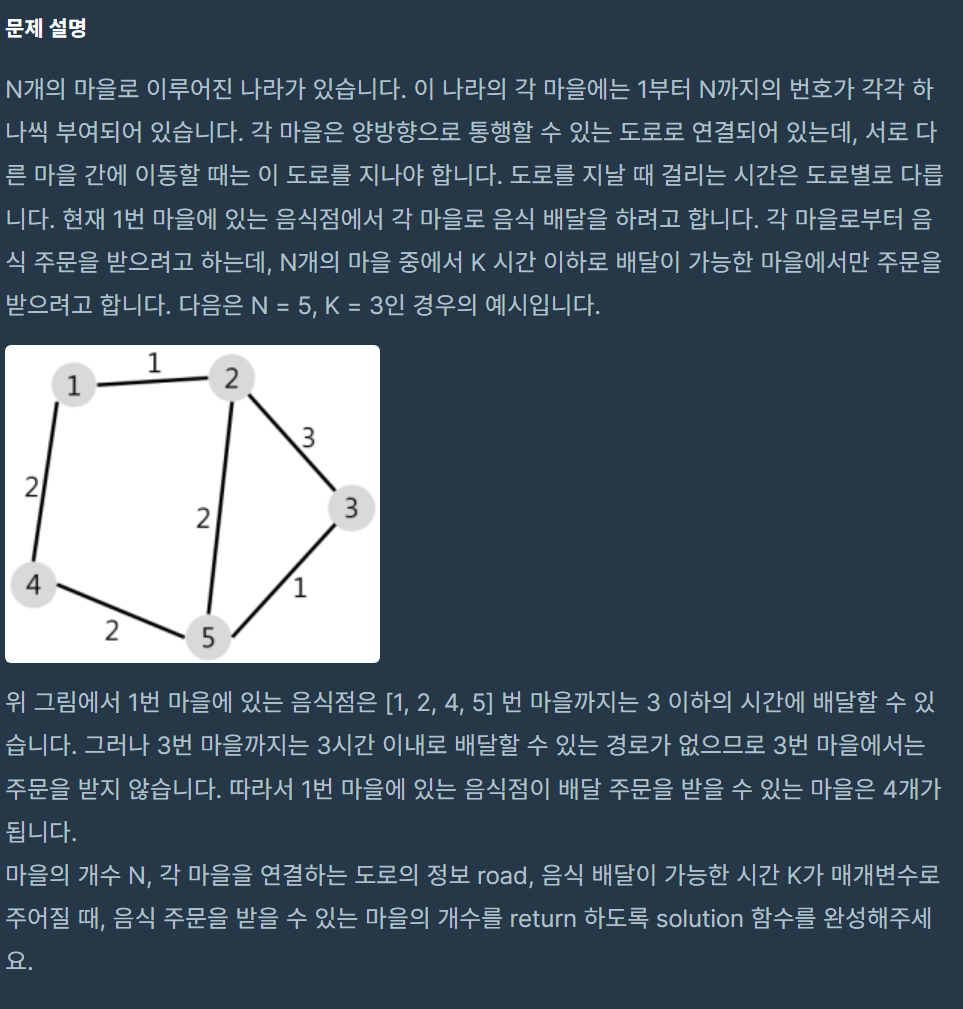

In [ ]:
road1 = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]

def distra(distance, graph):
    heap = []

    return pass


def solution(N, road, K)
    graph = [[] for _ in range(N + 1)]  # 각 노드에 연결된 간선 저장
    # 시작 노드에서 부터 각 노드까지의 최단 거리 리스트
    distance = [flaot("inf")] * (N + 1) # 무한수 제작 갱신용(시험문제 나오면 무조건 작성)
    distance[1] = 0

  for r in road:
      # 다익스트라 알고리즘
      # 두 개의 코드
      #

  distra(distance, graph):

    return len('여기 뭔가 들어와야됨')

In [30]:
# Solve using 다익스트라 알고리즘

import heapq

def solution(N, road, K):
    # Create adjacency list for the graph
    graph = [[] for _ in range(N + 1)]
    for a, b, c in road:
        graph[a].append((b, c))  # Undirected graph: add edge a -> b
        graph[b].append((a, c))  # Add edge b -> a

    # Initialize distances
    distances = [float('inf')] * (N + 1)
    distances[1] = 0  # Start at node 1

    # Priority queue for Dijkstra's algorithm
    pq = [(0, 1)]  # (distance, node)

    while pq:
        curr_dist, curr_node = heapq.heappop(pq)

        # Skip if we've found a better path already
        if curr_dist > distances[curr_node]:
            continue

        # Explore neighbors
        for next_node, weight in graph[curr_node]:
            distance = curr_dist + weight

            # If a shorter path is found
            if distance < distances[next_node]:
                distances[next_node] = distance
                heapq.heappush(pq, (distance, next_node))

    # Count nodes with distance <= K
    answer = sum(1 for dist in distances[1:N+1] if dist <= K)

    return answer

road1 = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
solution(5, road1, 3)

4

# Problem 3
https://school.programmers.co.kr/learn/courses/30/lessons/86971

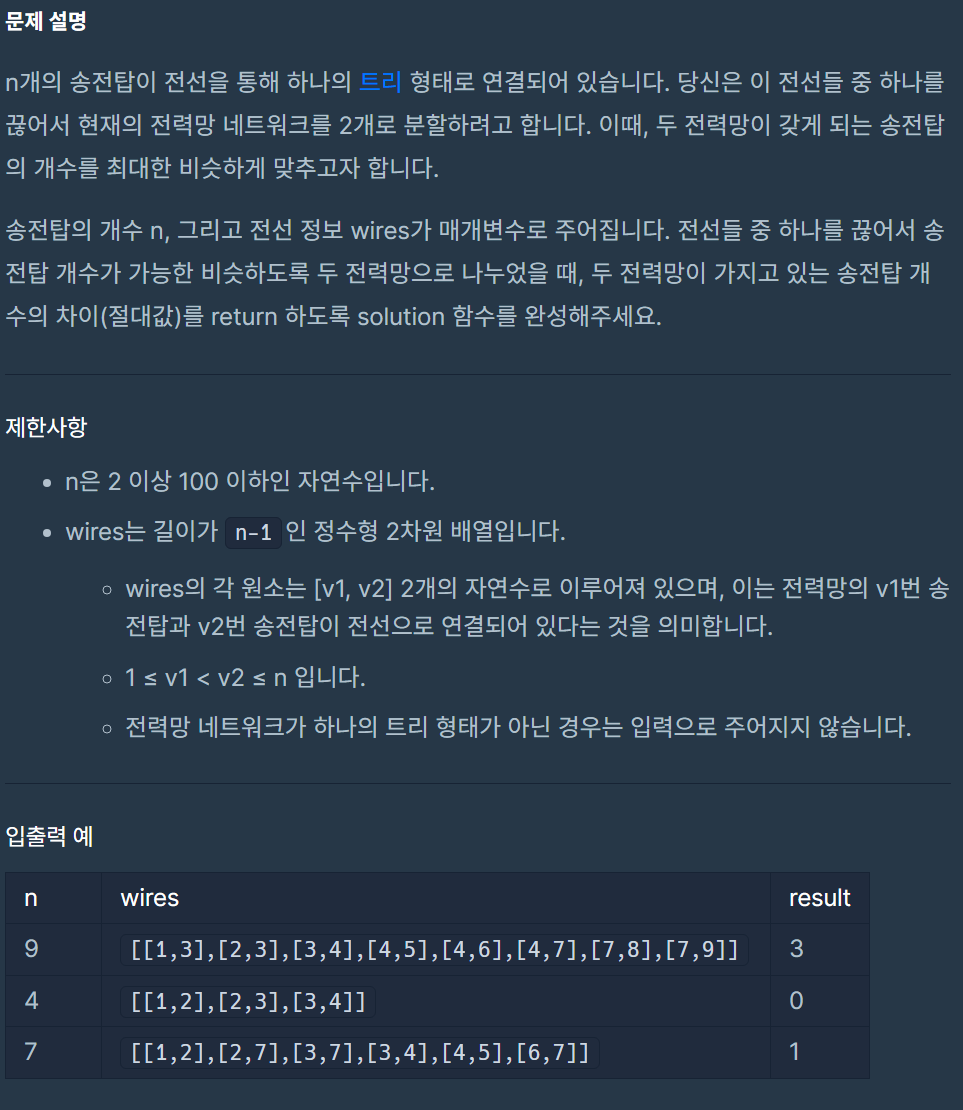

In [34]:
from collections import deque

def bfs(node, graph, visited):
    count = 0
    queue = deque([node])
    visited[node] = True

    while queue:
        current = queue.popleft()
        count += 1
        for neighbor in graph[current]:
            if not visited[neighbor]:
                visited[neighbor] = True
                queue.append(neighbor)

    return count

def solution(n, wires):
    # 결과 값을 매우 큰 값으로 초기화
    min_difference = float('inf')

    # 모든 전선을 순회하며 하나씩 끊어보기
    for i in range(len(wires)):
        # 그래프 생성
        graph = {i: [] for i in range(1, n + 1)}
        visited = [False] * (n + 1)  # 그래프 정의 후 방문 리스트 초기화
        for j, (v1, v2) in enumerate(wires):
            if i == j:  # i번째 전선을 끊는다.
                continue
            graph[v1].append(v2)
            graph[v2].append(v1)

        # BFS로 두 전력망의 크기를 구한다.
        # 첫 번째 전력망 크기
        size_one = bfs(1, graph, visited)
        # 두 번째 전력망 크기
        size_two = n - size_one

        # 두 전력망 크기의 차이를 계산
        min_difference = min(min_difference, abs(size_one - size_two))

    return min_difference

solution(9, [[1,3],[2,3],[3,4],[4,5],[4,6],[4,7],[7,8],[7,9]])

3